In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [5]:
#Limiting the data to only Cardinals players

cardinals_data = master_data.loc[master_data["Franchise"] == "Cardinals"]

#Only showing players that signed with the Cardinals

signed_cardinals_data = cardinals_data.loc[cardinals_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_cardinals_data.groupby("Year")

#Unsigned Cardinals draft picks

unsigned_cardinals_data = cardinals_data.loc[cardinals_data["Signed"] == "N"]

In [6]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1999    76.0
2009    48.2
2006    43.5
1984    40.6
1988    39.4
1998    37.4
1967    36.3
1971    36.0
1970    32.9
1982    30.0
1979    29.2
1995    26.7
2001    25.2
1974    24.8
1977    24.5
1987    24.1
2005    23.2
2012    20.8
2003    20.7
2000    20.0
1968    18.7
1997    17.8
2015    17.0
2011    16.0
1976    15.3
2014    14.6
2008    14.4
1994    14.3
1985    14.3
1991    14.3
1986    14.0
1981    13.7
2013    12.7
1990    11.7
1966    11.4
1993    11.2
1973     6.8
1983     6.6
2010     5.3
2016     5.3
1992     5.1
1969     3.6
1972     3.5
1965     3.3
1996     1.9
1980     1.6
1978     0.3
2018     0.0
2017     0.0
2019     0.0
1975    -0.3
2004    -0.4
1989    -0.8
2002    -1.1
2007    -4.1
Name: Total_WAR, dtype: float64

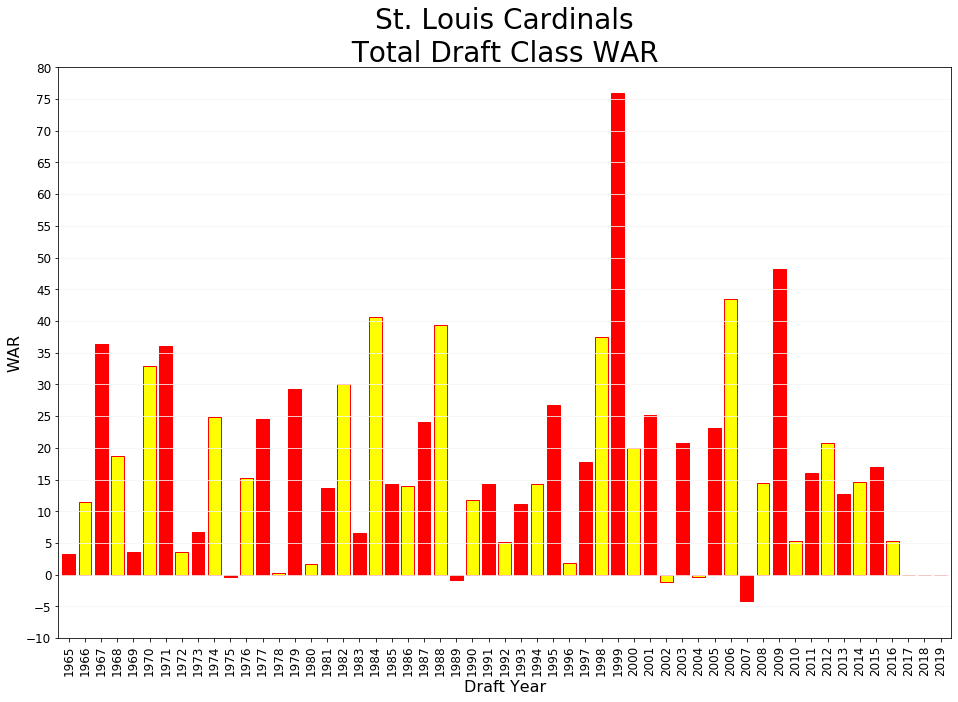

In [12]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["red", "yellow"], width = .8, fontsize = 12, edgecolor = "red", figsize = (16, 10.5))
plt.title("St. Louis Cardinals\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 81, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("St. Louis Cardinals WAR Total by Draft Year.png")
plt.show()

In [13]:
#Best draft picks in franchise history

signed_cardinals_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
37224,1999,13,402,Cardinals,Cardinals,Y,Albert Pujols,2001.0,pujolal01,1177.0,53.5,0.0,53.5,3B,JC,Maple Woods Community College,Kansas City,MO,More than 25 WAR
35382,1998,1,5,Cardinals,Cardinals,Y,J.D. Drew,1998.0,drewj.01,1152.0,26.1,0.0,26.1,OF,NaN,NaN,NaN,NaN,More than 25 WAR
39820,2001,2,72,Cardinals,Cardinals,Y,Dan Haren,2003.0,harenda01,1757.0,0.9,24.7,25.6,RHP,4Yr,Pepperdine University,Malibu,CA,More than 25 WAR
11488,1979,1,6,Cardinals,Cardinals,Y,Andy Van Slyke,1983.0,vanslan01,1013363.0,24.9,0.0,24.9,OF,HS,New Hartford HS,New Hartford,NY,20-25 WAR
6293,1971,42,785,Cardinals,Cardinals,Y,Keith Hernandez,1974.0,hernake01,1005706.0,23.8,0.0,23.8,1B,HS,Capuchino HS,San Bruno,CA,20-25 WAR
52052,2009,13,399,Cardinals,Cardinals,Y,Matt Carpenter,2011.0,carpema01,8090.0,23.7,0.0,23.7,3B,4Yr,Texas Christian University,Fort Worth,TX,20-25 WAR
16249,1984,22,554,Cardinals,Cardinals,Y,Jeff Fassero,1991.0,fasseje01,279.0,-0.9,23.4,22.5,LHP,4Yr,University of Mississippi,Oxford,MS,20-25 WAR
18329,1987,3,72,Cardinals,Cardinals,Y,Ray Lankford,1990.0,lankfra01,1044.0,22.1,0.0,22.1,OF,JC,Modesto Junior College,Modesto,CA,20-25 WAR
30380,1995,1,12,Cardinals,Cardinals,Y,Matt Morris,1997.0,morrima01,1172.0,0.8,20.8,21.6,RHP,4Yr,Seton Hall University,South Orange,NJ,20-25 WAR
19550,1988,1,30,Cardinals,Cardinals,Y,Brian Jordan,1992.0,jordabr01,658.0,19.3,0.0,19.3,OF,4Yr,University of Richmond,Richmond,VA,15-20 WAR


In [15]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_cardinals_data.loc[((signed_cardinals_data["WAR Group"] == "Less than 5 WAR") |
(signed_cardinals_data["WAR Group"] == "No Major League Experience")) & 
(signed_cardinals_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
19,1965,1,20,Cardinals,Cardinals,Y,Joe DiFabio,NaN,NaN,NaN,NaN,NaN,NaN,RHP,4Yr,Delta State University,Cleveland,MS,No Major League Experience
830,1966,1,7,Cardinals,Cardinals,Y,Leron Lee,1969.0,leele02,1007458.0,2.6,0.0,2.6,INF,HS,Grant Union HS,Sacramento,CA,Less than 5 WAR
2648,1968,1,19,Cardinals,Cardinals,Y,Butch Hairston,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Roth HS,Dayton,OH,No Major League Experience
3561,1969,1,20,Cardinals,Cardinals,Y,Charles Minott,NaN,NaN,NaN,NaN,NaN,NaN,LHP,HS,Royal Oak HS,Covina,CA,No Major League Experience
4594,1970,1,11,Cardinals,Cardinals,Y,Jim Browning,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Emma Sansom HS,Gadsden,AL,No Major League Experience
5518,1971,1,8,Cardinals,Cardinals,Y,Ed Kurpiel,NaN,NaN,NaN,NaN,NaN,NaN,1B,HS,Archbishop Molloy HS,Queens,NY,No Major League Experience
6332,1972,1,21,Cardinals,Cardinals,Y,Dan Larson,1976.0,larsoda01,1007361.0,0.5,0.7,1.2,RHP,HS,Alhambra HS,Alhambra,CA,Less than 5 WAR
7114,1973,1,12,Cardinals,Cardinals,Y,Joe Edelen,1981.0,edelejo01,1003666.0,0.0,0.0,0.0,3B,HS,Gracemont HS,Gracemont,OK,Less than 5 WAR
8552,1975,1,16,Cardinals,Cardinals,Y,David Johnson,NaN,NaN,NaN,NaN,NaN,NaN,LHP,HS,Gaylord HS,Gaylord,MI,No Major League Experience
10718,1978,1,15,Cardinals,Cardinals,Y,Bob Hicks,NaN,NaN,NaN,NaN,NaN,NaN,1B,HS,Gonzalez Tate HS,Pensacola,FL,No Major League Experience


In [17]:
#Best unsigned draft picks in franchise history

unsigned_cardinals_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
44006,2003,43,1291,Cardinals,Cardinals,N,Max Scherzer,2008.0,scherma01,3137.0,0.1,26.1,26.2,RHP,HS,Parkway Central HS,Chesterfield,MO,More than 25 WAR
10770,1978,3,67,Cardinals,Cardinals,N,Mike Moore,1982.0,mooremi01,1009122.0,0.0,24.3,24.3,RHP,HS,Eakly HS,Eakly,OK,20-25 WAR
8434,1974,28,587,Cardinals,Cardinals,N,Paul Molitor,1978.0,molitpa01,1009040.0,21.6,0.0,21.6,SS,HS,Cretin HS,St. Paul,MN,20-25 WAR
3799,1969,11,260,Cardinals,Cardinals,N,Bill Madlock,1973.0,madlobi01,1007957.0,19.5,0.0,19.5,3B,HS,Eisenhower HS,Decatur,IL,15-20 WAR
3437,1968,38,809,Cardinals,Cardinals,N,Ed Halicki,1974.0,haliced01,1005228.0,0.4,15.7,16.1,RHP,HS,Kearny HS,Kearny,NJ,15-20 WAR
7843,1973,49,741,Cardinals,Cardinals,N,Bryn Smith,1981.0,smithbr01,1012104.0,0.7,14.3,15.0,RHP,HS,Santa Maria HS,Santa Maria,CA,15-20 WAR
14320,1982,11,283,Cardinals,Cardinals,N,Rob Dibble,1988.0,dibblro01,1003269.0,-0.2,13.9,13.7,RHP,HS,Southington HS,Southington,CT,10-15 WAR
13155,1980,37,803,Cardinals,Cardinals,N,Rick Aguilera,1985.0,aguilri01,1000086.0,1.1,11.5,12.6,RHP,HS,Edgewood HS,West Covina,CA,10-15 WAR
3156,1968,23,528,Cardinals,Cardinals,N,Craig Swan,1973.0,swancr01,1012754.0,-0.2,11.4,11.2,RHP,HS,Millikan HS,Long Beach,CA,10-15 WAR
3751,1969,9,212,Cardinals,Cardinals,N,Bucky Dent,1973.0,dentbu01,1003212.0,10.5,0.0,10.5,3B,HS,Hialeah HS,Hialeah,FL,10-15 WAR


In [18]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_cardinals_data.loc[signed_cardinals_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
37224,1999,13,402,Cardinals,Cardinals,Y,Albert Pujols,2001.0,pujolal01,1177.0,53.5,0.0,53.5,3B,JC,Maple Woods Community College,Kansas City,MO,More than 25 WAR
6293,1971,42,785,Cardinals,Cardinals,Y,Keith Hernandez,1974.0,hernake01,1005706.0,23.8,0.0,23.8,1B,HS,Capuchino HS,San Bruno,CA,20-25 WAR
52052,2009,13,399,Cardinals,Cardinals,Y,Matt Carpenter,2011.0,carpema01,8090.0,23.7,0.0,23.7,3B,4Yr,Texas Christian University,Fort Worth,TX,20-25 WAR
16249,1984,22,554,Cardinals,Cardinals,Y,Jeff Fassero,1991.0,fasseje01,279.0,-0.9,23.4,22.5,LHP,4Yr,University of Mississippi,Oxford,MS,20-25 WAR
5393,1970,37,811,Cardinals,Cardinals,Y,Bake McBride,1973.0,mcbriba01,1008340.0,18.7,0.0,18.7,LHP,4Yr,Westminster College,Fulton,MO,15-20 WAR
3222,1968,26,594,Cardinals,Cardinals,Y,Bob Forsch,1974.0,forscbo01,1004233.0,3.2,14.8,18.0,3B,HS,Hiram Johnson HS,Sacramento,CA,15-20 WAR
47690,2006,16,496,Cardinals,Cardinals,Y,Tommy Pham,2014.0,phamth01,2967.0,15.5,0.0,15.5,SS,HS,Durango HS,Las Vegas,NV,15-20 WAR
29191,1994,19,530,Cardinals,Cardinals,Y,Placido Polanco,1998.0,polanpl01,1176.0,13.9,0.0,13.9,SS,4Yr,Miami-Dade College Wolfson Campus,Miami,FL,10-15 WAR
13503,1981,13,319,Cardinals,Cardinals,Y,Danny Cox,1983.0,coxda01,1002695.0,-0.9,11.9,11.0,RHP,4Yr,Troy University,Troy,AL,10-15 WAR
5263,1970,29,679,Cardinals,Cardinals,Y,John Denny,1974.0,dennyjo01,1003210.0,0.1,9.4,9.5,RHP,HS,Prescott HS,Prescott,AZ,5-10 WAR


In [19]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(cardinals_data["Year"], cardinals_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1965,53.6,39.3,7.1
1966,35.6,57.8,6.7
1967,14.3,78.6,7.1
1968,19.6,69.6,10.9
1969,27.5,57.5,15.0
1970,9.8,80.5,9.8
1971,17.8,75.6,6.7
1972,41.5,53.7,4.9
1973,46.2,44.2,9.6


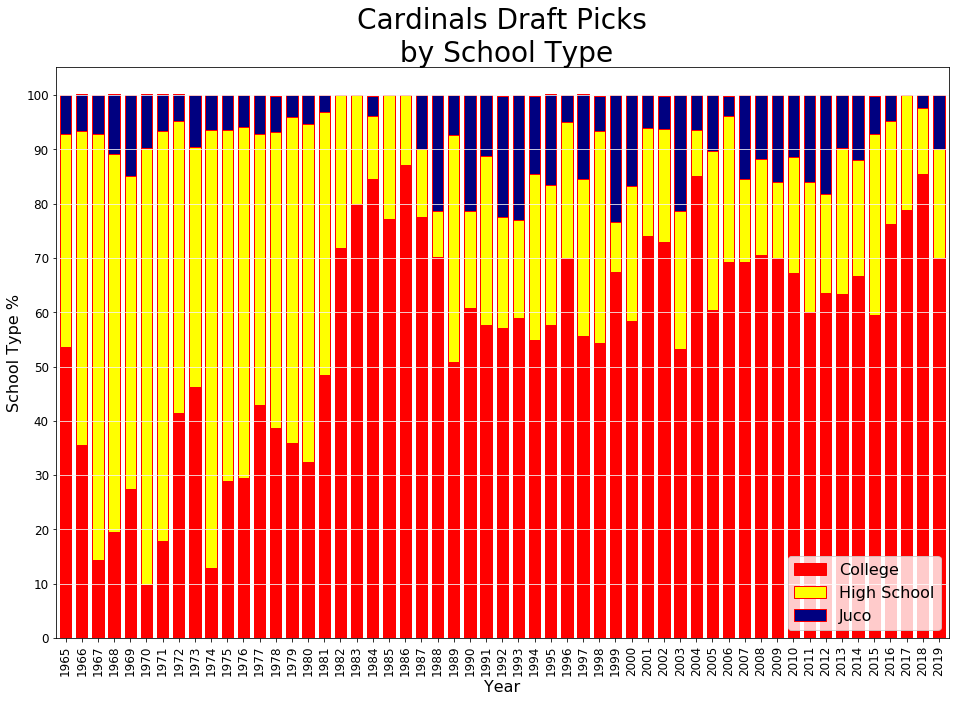

In [20]:
#Bar chart of table above

colors = ["red", "yellow", "navy"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "red", stacked = True, figsize = (16, 10.5))
plt.title("Cardinals Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Cardinals Draft Picks by School Type.png")
plt.show()